In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter
import numpy as np
import calmap

In [72]:
df_comments = pd.read_csv("./reddit_res/reddit_sentiment_comment_vader.csv")
#df_posts = pd.read_csv("./reddit_res/reddit_sentiment_post_geriberta.csv")
df_comments

,Unnamed: 0,text,created,Negative,Positive,Neutral,Compound,Overall
0,0,denke deshalb gerne rausfinden falsch mache,2023-05-23 10:04:18,0.296,0.000,0.704,-0.2732,Negative
1,1,wenns außer funktioniert wirds wohl liegen,2023-05-22 20:43:03,0.000,0.324,0.676,0.3400,Positive
2,2,theoretisch trotzdem immer zahlen zoll wohl an...,2023-05-22 19:59:01,0.000,0.232,0.768,0.5478,Positive
3,3,interessant irgendwas mach eindeutig falsch,2023-05-23 10:12:58,0.276,0.329,0.395,0.1027,Positive
4,4,letzte aliexpress-sendung absender rotterdam g...,2023-05-22 11:38:57,0.000,0.000,1.000,0.0000,Neutral
...,...,...,...,...,...,...,...,...
7424,7695,besitze auto mehr seit ca 10 jahren mache flug...,2023-05-09 17:58:22,0.042,0.103,0.855,0.3510,Positive
7425,7696,nö warum solange politik meint kohle hochzufah...,2023-05-09 21:04:45,0.049,0.233,0.718,0.7867,Positive
7426,7697,nö eigenen geldbeutel hilft niemand schenkt ge...,2023-05-10 17:59:33,0.197,0.431,0.372,0.5267,Positive
7427,7698,gar brauche auto beruflich fliegen,2023-05-11 02:41:18,0.000,0.000,1.000,0.0000,Neutral


In [73]:
# df_comments["negativeSentimentScore"] = df_comments["Scores"].map(lambda x: eval(x)[0][0])
# df_comments["neutralSentimentScore"] = df_comments["Scores"].map(lambda x: eval(x)[0][1])
# df_comments["positiveSentimentScore"] = df_comments["Scores"].map(lambda x: eval(x)[0][2])
df_comments.rename(columns={'Negative': 'negativeSentimentScore', "Positive": "positiveSentimentScore", "Neutral": "neutralSentimentScore"}, inplace=True)
df_comments

,Unnamed: 0,text,created,negativeSentimentScore,positiveSentimentScore,neutralSentimentScore,Compound,Overall
0,0,denke deshalb gerne rausfinden falsch mache,2023-05-23 10:04:18,0.296,0.000,0.704,-0.2732,Negative
1,1,wenns außer funktioniert wirds wohl liegen,2023-05-22 20:43:03,0.000,0.324,0.676,0.3400,Positive
2,2,theoretisch trotzdem immer zahlen zoll wohl an...,2023-05-22 19:59:01,0.000,0.232,0.768,0.5478,Positive
3,3,interessant irgendwas mach eindeutig falsch,2023-05-23 10:12:58,0.276,0.329,0.395,0.1027,Positive
4,4,letzte aliexpress-sendung absender rotterdam g...,2023-05-22 11:38:57,0.000,0.000,1.000,0.0000,Neutral
...,...,...,...,...,...,...,...,...
7424,7695,besitze auto mehr seit ca 10 jahren mache flug...,2023-05-09 17:58:22,0.042,0.103,0.855,0.3510,Positive
7425,7696,nö warum solange politik meint kohle hochzufah...,2023-05-09 21:04:45,0.049,0.233,0.718,0.7867,Positive
7426,7697,nö eigenen geldbeutel hilft niemand schenkt ge...,2023-05-10 17:59:33,0.197,0.431,0.372,0.5267,Positive
7427,7698,gar brauche auto beruflich fliegen,2023-05-11 02:41:18,0.000,0.000,1.000,0.0000,Neutral


In [74]:
def getYearMonth(s):
    return f"{s.year}-{s.month}"

df_comments['created'] = pd.to_datetime(df_comments['created'])

df_comments

,Unnamed: 0,text,created,negativeSentimentScore,positiveSentimentScore,neutralSentimentScore,Compound,Overall
0,0,denke deshalb gerne rausfinden falsch mache,2023-05-23 10:04:18,0.296,0.000,0.704,-0.2732,Negative
1,1,wenns außer funktioniert wirds wohl liegen,2023-05-22 20:43:03,0.000,0.324,0.676,0.3400,Positive
2,2,theoretisch trotzdem immer zahlen zoll wohl an...,2023-05-22 19:59:01,0.000,0.232,0.768,0.5478,Positive
3,3,interessant irgendwas mach eindeutig falsch,2023-05-23 10:12:58,0.276,0.329,0.395,0.1027,Positive
4,4,letzte aliexpress-sendung absender rotterdam g...,2023-05-22 11:38:57,0.000,0.000,1.000,0.0000,Neutral
...,...,...,...,...,...,...,...,...
7424,7695,besitze auto mehr seit ca 10 jahren mache flug...,2023-05-09 17:58:22,0.042,0.103,0.855,0.3510,Positive
7425,7696,nö warum solange politik meint kohle hochzufah...,2023-05-09 21:04:45,0.049,0.233,0.718,0.7867,Positive
7426,7697,nö eigenen geldbeutel hilft niemand schenkt ge...,2023-05-10 17:59:33,0.197,0.431,0.372,0.5267,Positive
7427,7698,gar brauche auto beruflich fliegen,2023-05-11 02:41:18,0.000,0.000,1.000,0.0000,Neutral


In [75]:
df_comments_filtered = df_comments.groupby(df_comments["created"].dt.to_period('M')).filter(lambda x: len(x) >= 5)
df_comments.groupby(df_comments["created"].dt.to_period('W')).count()

,Unnamed: 0,text,created,negativeSentimentScore,positiveSentimentScore,neutralSentimentScore,Compound,Overall
created,,,,,,,,
2021-08-09/2021-08-15,33,33,33,33,33,33,33,33
2021-08-16/2021-08-22,3,3,3,3,3,3,3,3
2021-09-20/2021-09-26,2,2,2,2,2,2,2,2
2022-05-02/2022-05-08,1,1,1,1,1,1,1,1
2022-07-11/2022-07-17,8,8,8,8,8,8,8,8
2022-07-25/2022-07-31,27,27,27,27,27,27,27,27
2022-11-21/2022-11-27,77,77,77,77,77,77,77,77
2022-11-28/2022-12-04,1,1,1,1,1,1,1,1
2022-12-05/2022-12-11,2,2,2,2,2,2,2,2


In [76]:
df_comments_monthly =  df_comments_filtered.groupby(df_comments["created"].dt.to_period('W')).mean(numeric_only=True).reset_index()

In [77]:
print("New DS limits: ", df_comments.agg({ 'created' : [np.min, np.max]}))
df_comments_monthly

New DS limits:                   created
amin 2021-08-10 21:41:33
amax 2023-05-24 22:06:48


,created,Unnamed: 0,negativeSentimentScore,positiveSentimentScore,neutralSentimentScore,Compound
0,2021-08-09/2021-08-15,3774.272727,0.088576,0.162303,0.749152,0.207515
1,2021-08-16/2021-08-22,3759.000000,0.019000,0.333333,0.647333,0.462467
2,2022-07-11/2022-07-17,3750.500000,0.012625,0.029750,0.957625,0.056950
3,2022-07-25/2022-07-31,3733.000000,0.091963,0.230778,0.677296,0.249881
4,2022-11-21/2022-11-27,3673.870130,0.084221,0.177519,0.738260,0.176425
5,2023-01-02/2023-01-08,3625.500000,0.000000,0.005750,0.994250,0.042375
6,2023-01-09/2023-01-15,4684.750000,0.117375,0.134563,0.748062,0.131969
7,2023-01-16/2023-01-22,4764.185185,0.102778,0.185111,0.712111,0.234193
8,2023-01-23/2023-01-29,4361.444444,0.102111,0.184037,0.713852,0.374163
9,2023-01-30/2023-02-05,4461.545455,0.067000,0.217818,0.715273,0.439873


In [78]:
def getTimeseriesSentimentGraph(df):
    fig = plt.figure(figsize = (10, 5))
    fig.patch.set_facecolor('white')

    ax=plt.axes()
    ax.patch.set_facecolor('white')
    ax.spines[['top','left','bottom']].set_visible(False)
    # Make the left spine thicker
    ax.spines['right'].set_linewidth(1.1)
    plt.grid(which="major", axis='x', color='#DAD8D7', alpha=0.25, zorder=1)
    plt.grid(which="major", axis='y', color='#DAD8D7', alpha=0.25, zorder=1)
   
    dfLimits = df.agg({ 'created' : [np.min, np.max]})
    print("New DS limits: ", dfLimits["created"]["amin"])

    fromD = dfLimits["created"]["amin"].strftime("%Y KW %W")
    toD = dfLimits["created"]["amax"].strftime("%Y KW %W")
    plt.title(f"Average monthly sentiment for {fromD} - {toD}")

    sns.lineplot(x =df['created'].astype(str), y = df['positiveSentimentScore'], legend='full', lw=1.5, label="positive sentiment", color='#36AE7C')
    sns.lineplot(x =df['created'].astype(str), y = df['neutralSentimentScore'], legend='full', lw=1.5, label="neutral sentiment", color='#6495ed')
    sns.lineplot(x =df['created'].astype(str), y = df['negativeSentimentScore'], legend='full', lw=1.5, label="negative sentiment", color='#D14D72')

    legend = plt.legend(bbox_to_anchor=(1, 1))
    frame = legend.get_frame()
    frame.set_facecolor('white')

    plt.xticks(rotation=90)
    #plt.xticks(np.arange(0, len(df['created']), step=5))  # Customize tick frequency if needed
    # Format x-axis tick labels as desired (e.g., "%Y-%m-%d")
    plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(df['created'].dt.strftime("%Y-KW%W")))

    plt.ylabel('Sentiment score')
    plt.xlabel('')
    plt.show()
    

In [79]:
def getTimeseriesSentimentBarGraph(df):
    dfLimits = df.agg({ 'created' : [np.min, np.max]})
    fromD = dfLimits["created"]["amin"].strftime("%d/%m/%Y")
    toD = dfLimits["created"]["amax"].strftime("%d/%m/%Y")
    df['date'] = df['created'].dt.strftime("%Y-KW %W")
    dfForChart = df[["date", "negativeSentimentScore", "neutralSentimentScore", "positiveSentimentScore"]]

    fig = plt.figure(figsize = (10, 5))
    fig.patch.set_facecolor('white')

    chart = dfForChart.plot(
        x="date", kind='bar', stacked=True,
        color=['#D14D72', '#89CFF0', '#36AE7C'],
        title=f"Average monthly sentiment for {fromD} - {toD}",
        figsize=(12,5)
    )
    
    chart.patch.set_facecolor('white')
    # # Make the left spine thicker
    chart.grid(which="major", axis='x', color='#DAD8D7', alpha=0.25, zorder=1)
    chart.grid(which="major", axis='y', color='#DAD8D7', alpha=0.25, zorder=1)
    chart.legend(bbox_to_anchor=(1, 1))

    plt.ylabel('Sentiment score')
    plt.xlabel('')

    plt.show()


<Figure size 720x360 with 0 Axes>

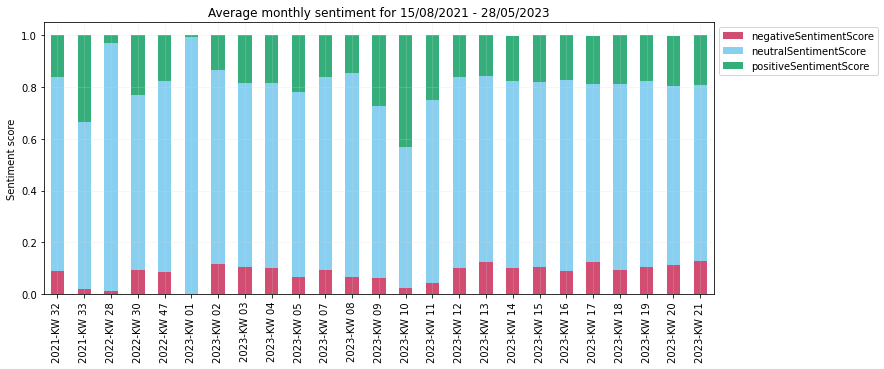

In [80]:
getTimeseriesSentimentBarGraph(df_comments_monthly)

New DS limits:  2021-08-09/2021-08-15


C:\Users\simon\AppData\Local\Temp\ipykernel_20212\2612951710.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(df['created'].dt.strftime("%Y-KW%W")))


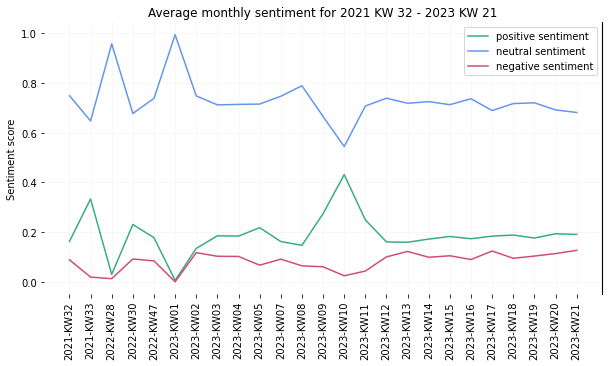

In [81]:
getTimeseriesSentimentGraph(df_comments_monthly)

In [82]:
df_comments_daily = df_comments.groupby(df_comments["created"].dt.to_period('D')).count()
df_comments_daily = df_comments_daily[["text"]]
df_comments_daily = df_comments_daily.reset_index()
#df_comments_daily = df_comments_daily.sort_values(by=['created'])
#df_comments_daily['created'] = pd.to_datetime(df_comments_daily.index)
df_comments_daily['created'] = pd.PeriodIndex(df_comments_daily['created'], freq='D').to_timestamp()
df_comments_daily

,created,text
0,2021-08-10,3
1,2021-08-11,28
2,2021-08-13,2
3,2021-08-16,1
4,2021-08-18,2
...,...,...
103,2023-05-20,671
104,2023-05-21,170
105,2023-05-22,412
106,2023-05-23,157


In [83]:
df_comments_daily_max = df_comments_daily.loc[df_comments_daily['text'].idxmax()]
df_comments_daily_max

created    2023-05-24 00:00:00
text                      1298
Name: 107, dtype: object

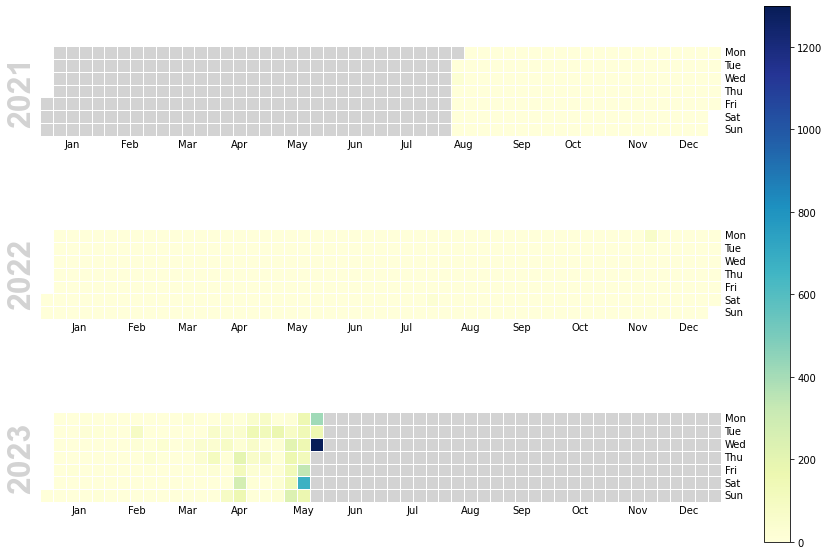

In [84]:
def plotCalendar(datafr, valueKey='text', colorscale='YlGnBu'):
    events = pd.Series(datafr[valueKey].to_list(), index=datafr['created'].to_list())

    fig,ax = calmap.calendarplot(events, fillcolor='lightgray', cmap=colorscale)
    fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist())
    fig.set_size_inches(14.5, 8.5)
plotCalendar(df_comments_daily)

In [85]:
df_comments_daily_sentiment = df_comments.groupby(df_comments["created"].dt.to_period('D')).mean().reset_index()
df_comments_daily_sentiment['created'] = pd.PeriodIndex(df_comments_daily_sentiment['created'], freq='D').to_timestamp()
df_comments_daily_sentiment

,created,Unnamed: 0,negativeSentimentScore,positiveSentimentScore,neutralSentimentScore,Compound
0,2021-08-10,3788.666667,0.104000,0.241667,0.654333,0.322533
1,2021-08-11,3772.714286,0.086464,0.154821,0.758750,0.192989
2,2021-08-13,3774.500000,0.095000,0.148000,0.757000,0.238350
3,2021-08-16,3759.000000,0.057000,0.048000,0.894000,-0.183200
4,2021-08-18,3759.000000,0.000000,0.476000,0.524000,0.785300
...,...,...,...,...,...,...
103,2023-05-20,5231.678092,0.116833,0.190128,0.691560,0.147312
104,2023-05-21,4327.582353,0.083053,0.210706,0.706247,0.212309
105,2023-05-22,2565.351942,0.112015,0.199192,0.688762,0.184027
106,2023-05-23,3692.420382,0.099134,0.176083,0.724739,0.210125


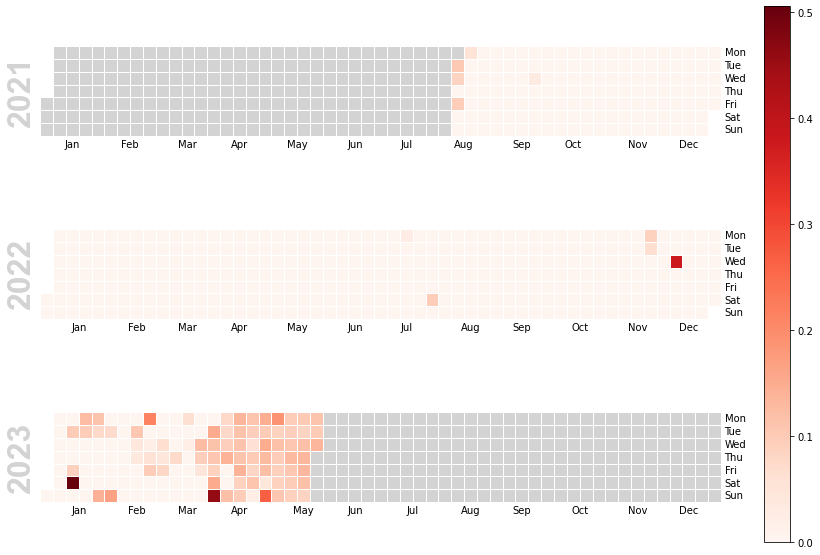

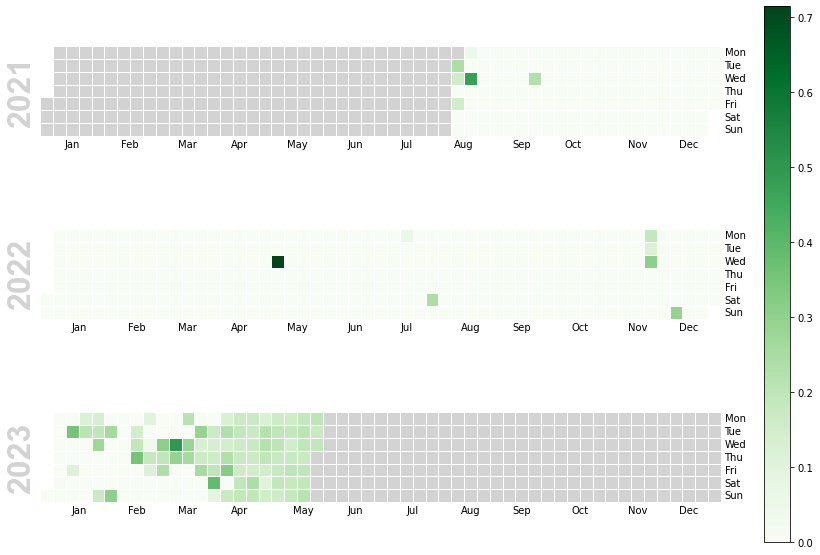

In [86]:
plotCalendar(df_comments_daily_sentiment, 'negativeSentimentScore', colorscale="Reds")

plotCalendar(df_comments_daily_sentiment, 'positiveSentimentScore', colorscale="Greens")